The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns =>

*   CRIM - per capita crime rate by town
*   ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

*   INDUS - proportion of non-retail business acres per town.
*   CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
*   NOX - nitric oxides concentration (parts per 10 million)
*   RM - average number of rooms per dwelling
*   AGE - proportion of owner-occupied units built prior to 1940
*   DIS - weighted distances to five Boston employment centres
*   RAD - index of accessibility to radial highways
*   TAX - full-value property-tax rate per $10,000

*   PTRATIO - pupil-teacher ratio by town
*   B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*   LSTAT - % lower status of the population
*   MEDV - Median value of owner-occupied homes in $1000's



In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [72]:
data = pd.read_csv('/content/housing2.csv')
data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [73]:
data.isnull().sum()

,0
Unnamed: 0,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0


In [74]:
correlation_matrix = data.corr().round(2)

<Axes: >

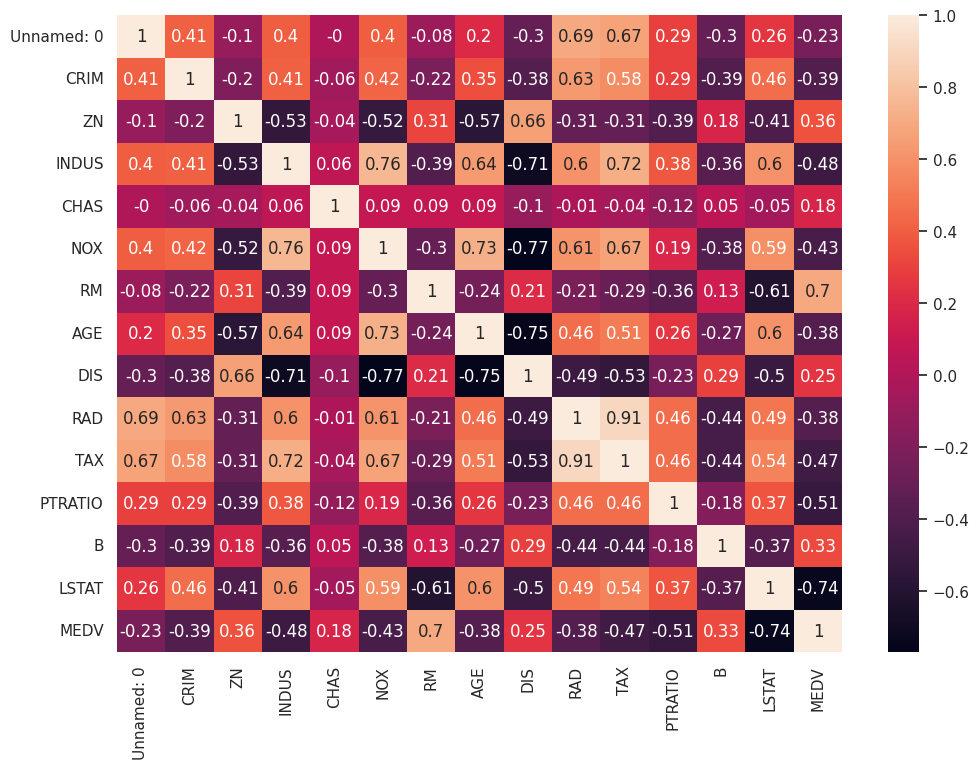

In [75]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=correlation_matrix, annot=True)

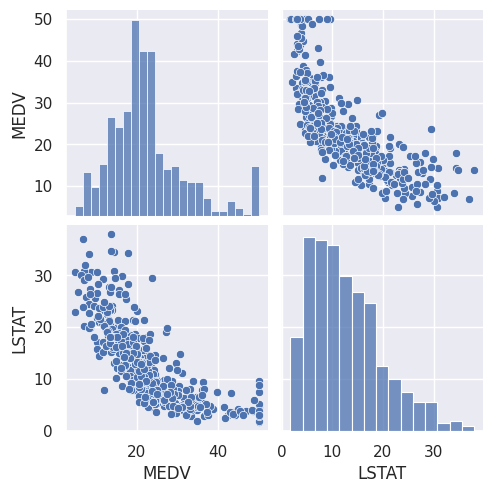

In [76]:
sns.pairplot(data[['MEDV', 'LSTAT']]);

# Linear Regression

In [77]:
X

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [78]:
Y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [79]:
from sklearn.model_selection import train_test_split

X = data[['LSTAT']]
Y = data['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,shuffle=True, random_state=42)

In [80]:
X_train

,LSTAT
5,5.21
116,12.04
45,10.21
16,6.58
468,18.13
...,...
106,18.66
270,13.00
348,5.99
435,23.27


In [81]:
Y_train

,MEDV
5,28.7
116,21.2
45,19.3
16,23.1
468,19.1
...,...
106,19.5
270,21.1
348,24.5
435,13.4


In [82]:
X_test

,LSTAT
173,9.04
274,3.53
491,18.07
72,5.52
452,17.27
...,...
441,19.52
23,19.88
225,4.63
433,16.22


In [83]:
Y_test

,MEDV
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1
...,...
441,17.1
23,14.5
225,50.0
433,14.3


In [84]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(X_train, Y_train)



LinearRegression()

In [85]:
y_train_predict = reg_model.predict(X_train)

y_test_predict = reg_model.predict(X_test)

In [86]:
y_train_predict.shape

(354,)

In [87]:
Y_train


,MEDV
5,28.7
116,21.2
45,19.3
16,23.1
468,19.1
...,...
106,19.5
270,21.1
348,24.5
435,13.4


In [88]:
from sklearn.metrics import mean_squared_error

rmse_train = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
print("rmse on trainset:",rmse_train)
print("rmse on testset:",rmse_test)

rmse on trainset: 6.231811185134833
rmse on testset: 6.1724146152405135


In [89]:
from sklearn.metrics import r2_score

r2_train = r2_score(Y_train, y_train_predict)
r2_test = r2_score(Y_test, y_test_predict)
print("r2 on trainset:",r2_train)
print("r2 on testset:",r2_test)

r2 on trainset: 0.5581683269380144
r2 on testset: 0.4886979007906852


# Multivariable Linear Regression

In [90]:
data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [91]:
data.drop('MEDV',axis=1)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [92]:
X = data.drop('MEDV',axis=1)
Y = data['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)

In [93]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [94]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)


In [95]:
rmse_train = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
print("rmse on trainset:",rmse_train)
print("rmse on testset:",rmse_test)

rmse on trainset: 4.362491096806646
rmse on testset: 5.528652795866257


In [96]:
r2_train = r2_score(Y_train, y_train_predict)
r2_test = r2_score(Y_test, y_test_predict)
print("r2 on trainset:",r2_train)
print("r2 on testset:",r2_test)

r2 on trainset: 0.7616234862942831
r2 on testset: 0.6785477606598935


# Polynomial Regression


In [97]:
corr_matrix = data.corr()
corr_with_target = corr_matrix['MEDV'][['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

# Select the features with the highest correlation coefficients
top_features = corr_with_target.abs().nlargest(n=2)

In [98]:
top_features.index

Index(['LSTAT', 'RM'], dtype='object')

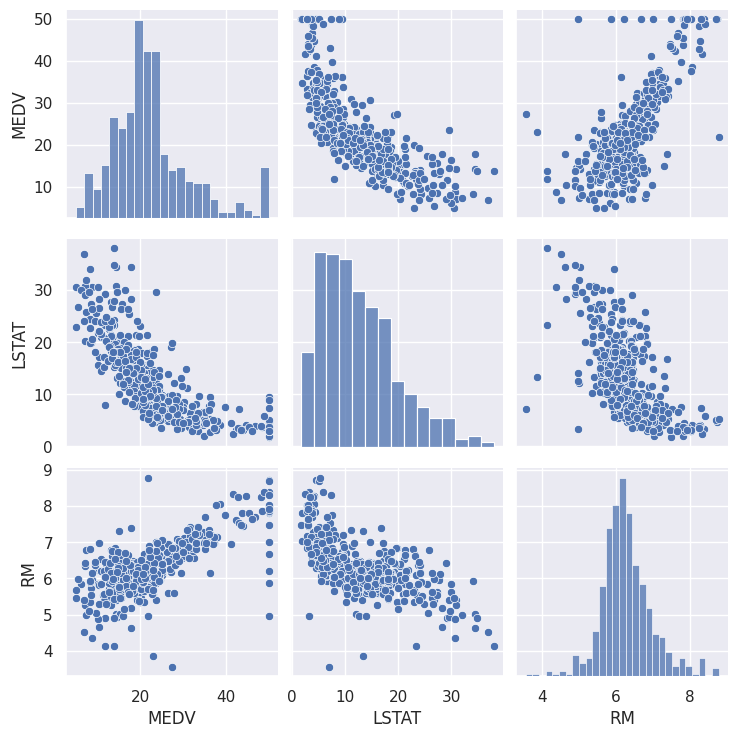

In [99]:
sns.pairplot(data[['MEDV', 'LSTAT', 'RM']]);


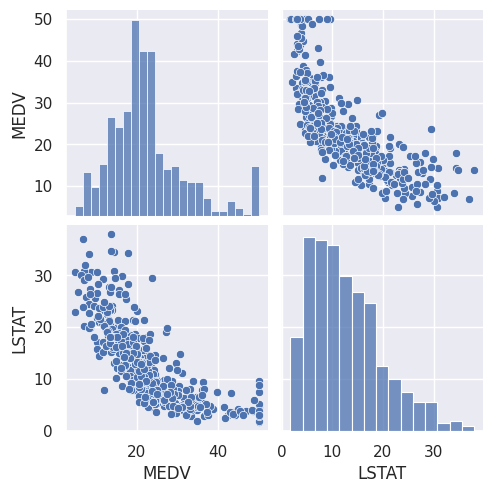

In [100]:
sns.pairplot(data[['MEDV', 'LSTAT']])

In [102]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)


X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [103]:
model = LinearRegression()
model.fit(X_train_poly, Y_train)

LinearRegression()

In [104]:
y_train_predict = model.predict(X_train_poly)
y_test_predict = model.predict(X_test_poly)

In [105]:
rmse_train = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
print("rmse on trainset:",rmse_train)
print("rmse on testset:",rmse_test)

rmse on trainset: 2.124797535361593
rmse on testset: 4.104978514626989


In [106]:
r2_train = r2_score(Y_train, y_train_predict)
r2_test = r2_score(Y_test, y_test_predict)
print("r2 on trainset:",r2_train)
print("r2 on testset:",r2_test)

r2 on trainset: 0.9434504094882742
r2 on testset: 0.8227853591843689


# Ridge Regression + polynomial Transformation

In [107]:
from sklearn.linear_model import Lasso, Ridge

model = Ridge()
model.fit(X_train_poly, Y_train)

Ridge()

In [108]:
y_train_predict = model.predict(X_train_poly)
y_test_predict = model.predict(X_test_poly)

In [109]:
r2_train = r2_score(Y_train, y_train_predict)
r2_test = r2_score(Y_test, y_test_predict)
print("r2 on trainset:",r2_train)
print("r2 on testset:",r2_test)

r2 on trainset: 0.9369646082765194
r2 on testset: 0.8127392226142871


# Ridge Regression + polynomial Transformation + Scaling

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
scaler = StandardScaler()
X_train_poly_s = scaler.fit_transform(X_train_poly)
X_test_poly_s = scaler.transform(X_test_poly)

In [112]:
model = Ridge()
model.fit(X_train_poly_s, Y_train)


Ridge()

In [113]:
y_train_predict = model.predict(X_train_poly_s)
y_test_predict = model.predict(X_test_poly_s)


In [114]:
r2_train = r2_score(Y_train, y_train_predict)
r2_test = r2_score(Y_test, y_test_predict)
print("r2 on trainset:",r2_train)
print("r2 on testset:",r2_test)

r2 on trainset: 0.9128067496956839
r2 on testset: 0.880307023213948
